# 📦 PyMC 5 Setup on macOS (Conda Environment)

This guide walks you through setting up **PyMC 5** on **macOS** using Conda. Each step ensures your environment is correctly configured for Bayesian modeling.

---

## ✅ Step 1: Activate Your Conda Environment
Start by activating your environment where PyMC will be installed:

    conda activate baysian_analysis

You can check if you are in the correct environment by listing all environments:

    conda info --envs

The active environment should have a `*` next to `baysian_analysis`.

---

## ✅ Step 2: Install PyMC and Check Versions
Install PyMC if needed:

    conda install -c conda-forge pymc

After installation, confirm versions:

```python
import pymc as pm
import aesara

print(f"PyMC version: {pm.__version__}")
print(f"Aesara version: {aesara.__version__}")
```

You should see:
```
PyMC version: 5.x.x
Aesara version: 2.x.x
```

---

## ✅ Step 3: Check BLAS Configuration
BLAS is critical for Aesara's backend computations. To check BLAS settings:

```python
import aesara
print(f"BLAS settings: {aesara.config.blas__ldflags}")
```

If the output is empty, install OpenBLAS:

    conda install -c conda-forge openblas

To refresh Aesara’s configuration:

```python
import aesara
aesara.config.defaults()
```

---

## ✅ Step 4: Install and Verify Graphviz
Graphviz is required for graph visualization in PyMC.

To check installation:

```python
import graphviz
print("Graphviz is installed correctly!")
```

If missing, install via Conda:

    conda install -c conda-forge graphviz python-graphviz

---

## ✅ Step 5: Test PyMC with a Simple Model
Run this quick test to ensure PyMC works correctly:

```python
import pymc as pm

with pm.Model() as model:
    p = pm.Beta("p", alpha=1, beta=1)
    obs = pm.Binomial("obs", n=10, p=p, observed=3)
    trace = pm.sample(1000, return_inferencedata=True)

print(trace)
```

You should see a progress bar and a summary table at the end.

---



# Examples


In [ ]:
# install required packages if needed
# %pip install pymc numpyro jax jaxlib arviz graphviz seaborn --quiet
# !module load graphviz
# !conda install -c conda-forge graphviz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

import graphviz as gv

import warnings

warnings.filterwarnings("ignore")

## 1. Introduction to PyMC

###  visulaizing the computational graph of a simple model

In [ ]:

with pm.Model() as model:
    # Prior distribution: X follows a Normal(0, 1)
    x = pm.Normal("x", mu=0, sigma=1)

    # Deterministic transformation: Y = X²
    y = pm.Deterministic("y", x**2)  

# Display the computational graph
pm.model_to_graphviz(model)


### Example 1: A Simple Bayesian Model to Estimate the percentage of water on earth with PyMC
### Example 1: A Simple Bayesian Model to Estimate the Percentage of Water on Earth with PyMC

**Experiment Description:**
- We have a globe that we spin and drop randomly
- Each time it lands, we record whether it shows water or land
- Our goal: Estimate what percentage of Earth's surface is covered by water

**Bayesian Approach:**
1. **Prior**: We start with a uniform prior (Beta(1,1)) - any water percentage from 0-100% is equally likely
2. **Data Collection**: We observe outcomes from spinning the globe
3. **Posterior**: We update our belief about water coverage based on observed data

**What We'll Explore:**
- How our estimate improves as we collect more data:
    - First with 10 spins
    - Then with 100 more spins
    - Finally with 1000 more spins
- How the posterior distribution becomes narrower (more certain) with increasing data
- Proper vs. improper ways to update our Bayesian model with new information


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 27 seconds.


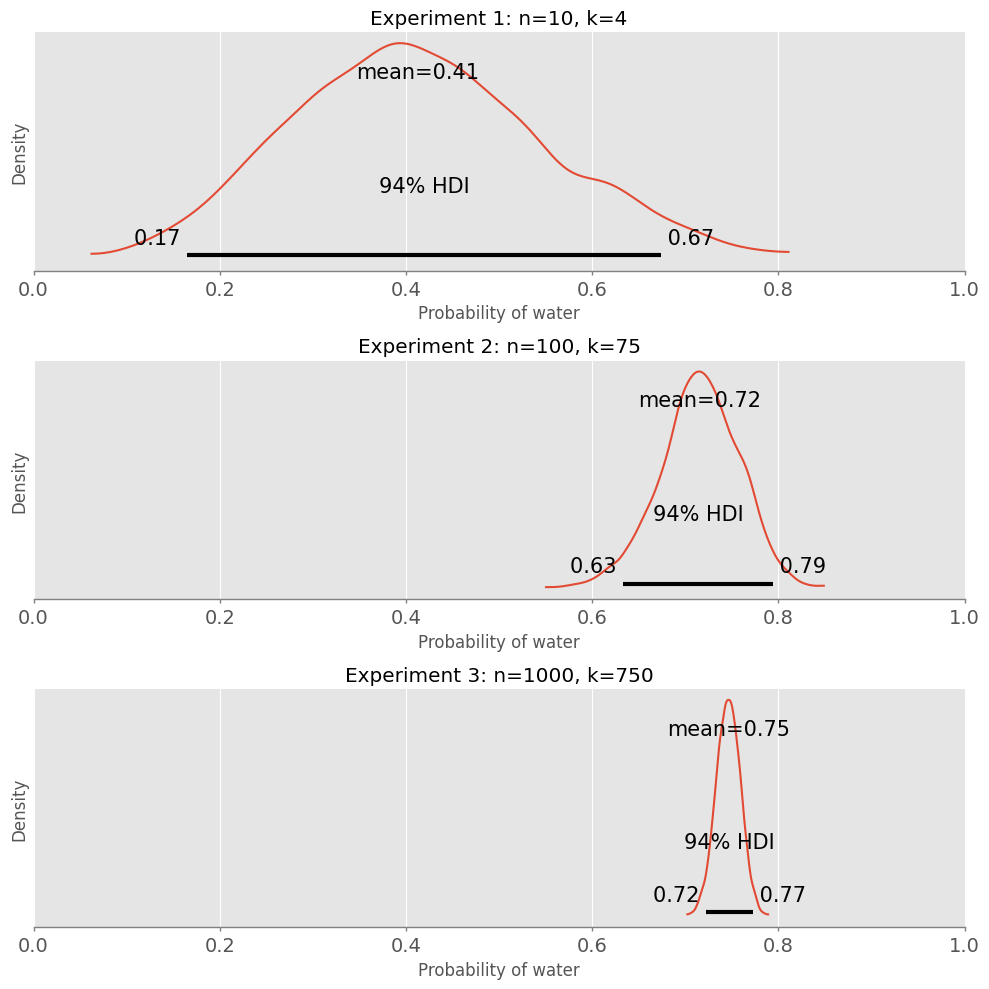

In [8]:
# First experiment: 10 tosses of globe with 4 lands on water and 6 on land
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Define experiments as a list of tuples (n, k) where n is number of trials and k is number of water observations
experiments = [(10, 4), (100, 75), (1000, 750)]
posteriors = []

curren_n,current_k = 0,0
for n, k in experiments:
    with pm.Model() as model:
        # Prior for probability of water
        p = pm.Uniform("p", lower=0, upper=1)
        
        # Binomial likelihood - directly use k as the observed value

        curren_n,current_k = curren_n+n,current_k+k
        water = pm.Binomial("water", n=curren_n, p=p, observed=current_k)
        
        # Sample from the posterior
        trace = pm.sample(1000, tune=100, return_inferencedata=True)
        posteriors.append(trace)

# Plot all three posteriors
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
plt.style.use("ggplot")

for i, trace in enumerate(posteriors):
    az.plot_posterior(trace, var_names=["p"], ax=axes[i])
    axes[i].set_title(f"Experiment {i+1}: n={experiments[i][0]}, k={experiments[i][1]}")
    axes[i].set_xlabel("Probability of water")
    axes[i].set_ylabel("Density")
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()



*interpretation of the results*
- The posterior distribution becomes narrower and more certain as we collect more data
- The peak of the posterior shifts towards the true value (70% water)
- The 95% credible interval becomes narrower and more accurate with more data


### A/B Testing with PyMC: Comparing Conversion Rates

**Experiment Overview:**
- Comparing two webpage designs (A vs B) to determine which drives higher conversion rates
- 7-day experiment with simulated user behavior data
- Bayesian approach to quantify uncertainty and estimate true difference in performance

**Analysis Goals:**
- Estimate probability that Design B outperforms Design A
- Determine expected lift in conversion rate
- Provide decision framework based on posterior distribution

**Key Metrics:**
- Conversion rate (primary KPI)
- Probability of beating control
- 95% credible intervals for business decisions


In [16]:
# simulate the conversion rate of a website


# Define the true conversion rates to generate the data
page_a_conversion_rate = 0.05
page_b_conversion_rate = 0.07

# Set random seed for reproducibility
np.random.seed(42)

# Generate 7 days of data
days = 3
page_a_data = []
page_b_data = []

for day in range(days):
    # Generate daily visitors (between 500-1500)
    page_a_visitors = np.random.randint(500, 1500)
    page_b_visitors = np.random.randint(500, 1500)
    
    # Calculate conversions using binomial distribution
    page_a_conversions = np.random.binomial(page_a_visitors, page_a_conversion_rate)
    page_b_conversions = np.random.binomial(page_b_visitors, page_b_conversion_rate)
    
    # Store the results
    page_a_data.append((page_a_visitors, page_a_conversions))
    page_b_data.append((page_b_visitors, page_b_conversions))

# Display the data
print("Page A data (visitors, conversions):", page_a_data)
print("Page B data (visitors, conversions):", page_b_data)


# run the experiment for 7 days


posteriors = []
current_visitors_a, currennt_conversions_a, current_visitors_b, current_conversions_b = 0,0,0,0
for i in range(days):
    current_visitors_a += page_a_data[i][0]
    currennt_conversions_a += page_a_data[i][1]
    current_visitors_b += page_b_data[i][0]
    current_conversions_b += page_b_data[i][1]

    with pm.Model() as model:
        # prior for pages A and B as beta distributions

        p_a=pm.Beta("p_a",alpha=currennt_conversions_a+1,beta=current_visitors_a-currennt_conversions_a + 1) 
        p_b=pm.Beta("p_b",alpha=current_conversions_b+1,beta=current_visitors_b-current_conversions_b + 1)


        # likelihood
        obs_a = pm.Binomial("obs_a", n=current_visitors_a, p=p_a, observed=currennt_conversions_a)
        obs_b = pm.Binomial("obs_b", n=current_visitors_b, p=p_b, observed=current_conversions_b)

        # difference between the conversion rates
        delta = pm.Deterministic("delta", p_b - p_a)

        # Sample from the posterior
        trace = pm.sample(1000, tune=1000, return_inferencedata=True)
        posteriors.append(trace.posterior)


Page A data (visitors, conversions): [(602, 31), (587, 31), (1269, 74)]
Page B data (visitors, conversions): [(935, 68), (872, 64), (843, 61)]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_a, p_b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_a, p_b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_a, p_b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


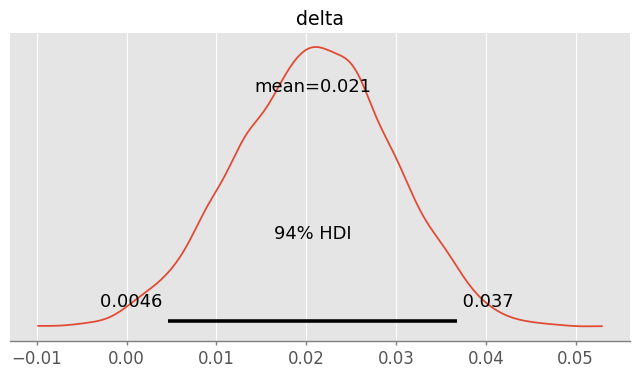

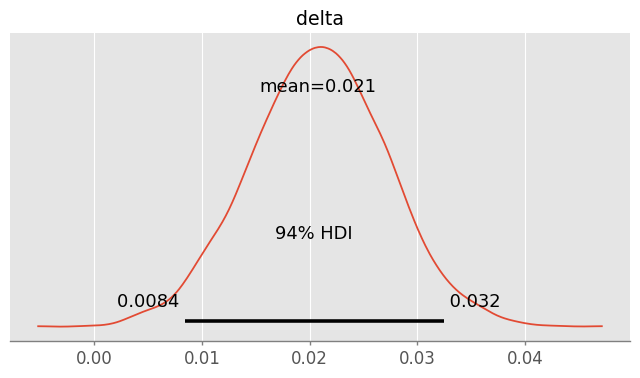

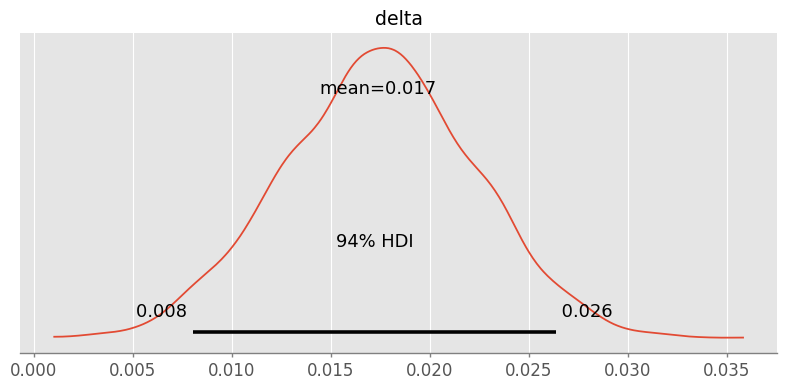

In [17]:


# Plot the posteriors
plt.style.use("ggplot")

for i in range(days):
    az.plot_posterior(posteriors[i], var_names=["delta"], figsize=(8, 4), textsize=12)

plt.tight_layout()
plt.show()


# Estimating Cheating Rates with a Privacy Algorithm

In this example, we estimate the true cheating rate (p) among 100 students using a randomized response (Privacy) algorithm that preserves student anonymity. The interview process is as follows:

1. **First Coin Flip:**  
   - If **Heads (50%)**, the student answers truthfully.
   - If **Tails (50%)**, the student flips a second coin.
2. **Second Coin Flip (if first was Tails):**  
   - If **Heads (50%)**, the student answers “Yes, I did cheat” (forced response).
   - If **Tails (50%)**, the student answers “No, I did not cheat” (forced response).

Thus, the probability of a “Yes” response is:

$$
p_{\text{yes}} = 0.5 \cdot p + 0.5 \cdot 0.5 = 0.5p + 0.25
$$

where \(p\) is the true proportion of cheaters.

In our model:
- We assign a Uniform(0,1) prior to \(p\).
- Each student’s true cheating status is modeled as a Bernoulli random variable.
- The coin flips are also modeled as Bernoulli variables.
- A deterministic variable computes the observed “Yes” proportion based on the Privacy Algorithm.
- Finally, we use a Binomial likelihood (with N = 100 and the computed observed proportion) to compare with the actual survey data (e.g., 35 “Yes” responses).


In [42]:
# simualt the data for the deceit model
np.random.seed(42)
p_lie = 0.35

# generate 100 survey answer with 40% of them being a lie
N_from_deceit_servey = 100
answers = np.random.binomial(1, p_lie, N_from_deceit_servey )

print("True answers:", answers[:10])
print("Proportion of lies:", answers.sum())

True answers: [0 1 1 0 0 0 0 1 0 1]
Proportion of lies: 32


In [43]:
with pm.Model() as cheating_model:
    # Prior for the proportion of lies
    p = pm.Uniform("p", lower=0, upper=1)
    
    p_yes= pm.Deterministic("p_yes", .5 * p + .25)
    # Likelihood
    lies = pm.Binomial("lies",n=N_from_deceit_servey, p=p_yes, observed=answers.sum())
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


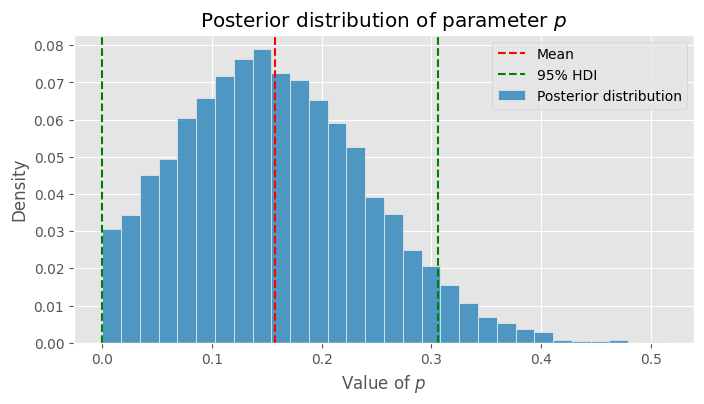

In [44]:
plt.figure(figsize=(8, 4))
plt.style.use("ggplot")

p_trace = trace.posterior["p"].values.flatten()

# Calculate the 95% HDI
hdi_95 = az.hdi(p_trace, hdi_prob=0.95)

# Plot the posterior distribution
sns.histplot(p_trace, stat="probability", alpha=0.85, bins=30, label="Posterior distribution", color="#348ABD")

# Plot the mean
mean_p = np.mean(p_trace)
plt.axvline(mean_p, color="red", linestyle="--", label="Mean")

# Plot the 95% HDI
plt.axvline(hdi_95[0], color="green", linestyle="--", label="95% HDI")
plt.axvline(hdi_95[1], color="green", linestyle="--")

plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend()
plt.show()


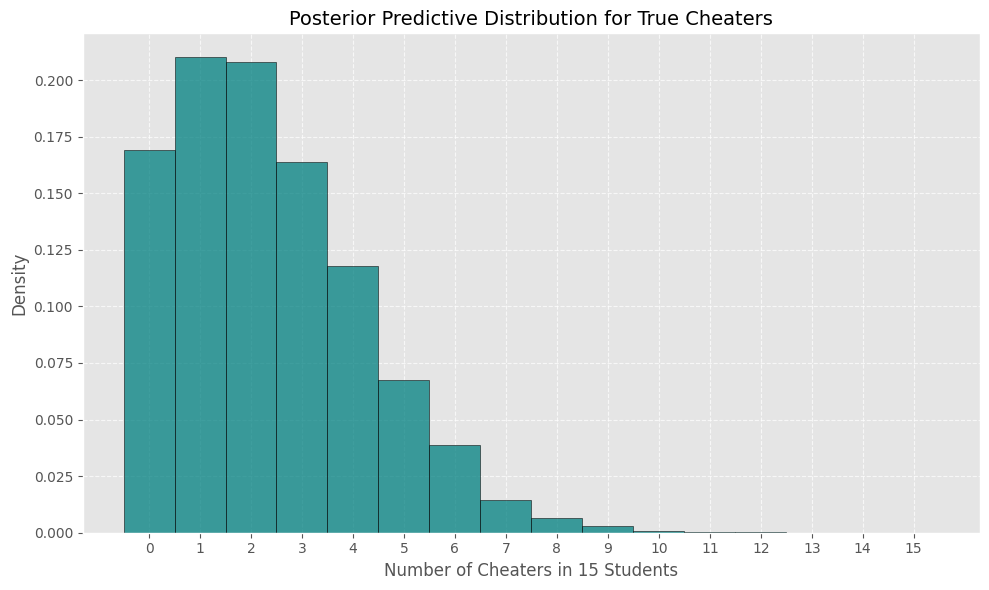

In [46]:
## Predict the actual cheated students in the next 15 students
p_samples = trace.posterior["p"].values.flatten()
next_students = 15

# Generate the predictive distribution for the number of true cheaters among 15 new students.
predicted_true_cheaters = np.random.binomial(next_students, p_samples)

# Plot the predictive distribution:
plt.figure(figsize=(10, 6))
bins = np.arange(next_students + 2) - 0.5  # Create bins for histogram

plt.hist(predicted_true_cheaters, bins=bins, density=True, alpha=0.75, color="teal", edgecolor="black")
plt.xticks(range(next_students + 1))
plt.xlabel("Number of Cheaters in 15 Students", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Posterior Predictive Distribution for True Cheaters", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Estimating O-Ring Failure Risk in the Challenger Disaster

In this example, we investigate the relationship between ambient temperature and the probability of O-ring failure—a key factor in the Challenger space shuttle disaster. Historical data indicate that lower temperatures were associated with a higher failure rate of O-rings, which ultimately contributed to the catastrophic failure of the shuttle.

Our goal is to use Bayesian inference to:
- Model the O-ring failure probability as a function of temperature.
- Estimate the risk of failure under different temperature conditions.
- Quantify the uncertainty in our estimates.

We will:
- Use observed data on O-ring failures (e.g., the number of failures out of a given number of flights at specific temperatures).
- Define a likelihood function (typically a Binomial model, or a logistic regression for a temperature-dependent model).
- Choose appropriate priors (such as Beta priors or priors on logistic regression coefficients) to reflect our uncertainty about the underlying failure rates.

Below, we implement this model using PyMC to obtain the posterior distribution of the failure probability, thereby gaining insight into how temperature affected the risk of O-ring failure.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, temp_effect]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 7 seconds.


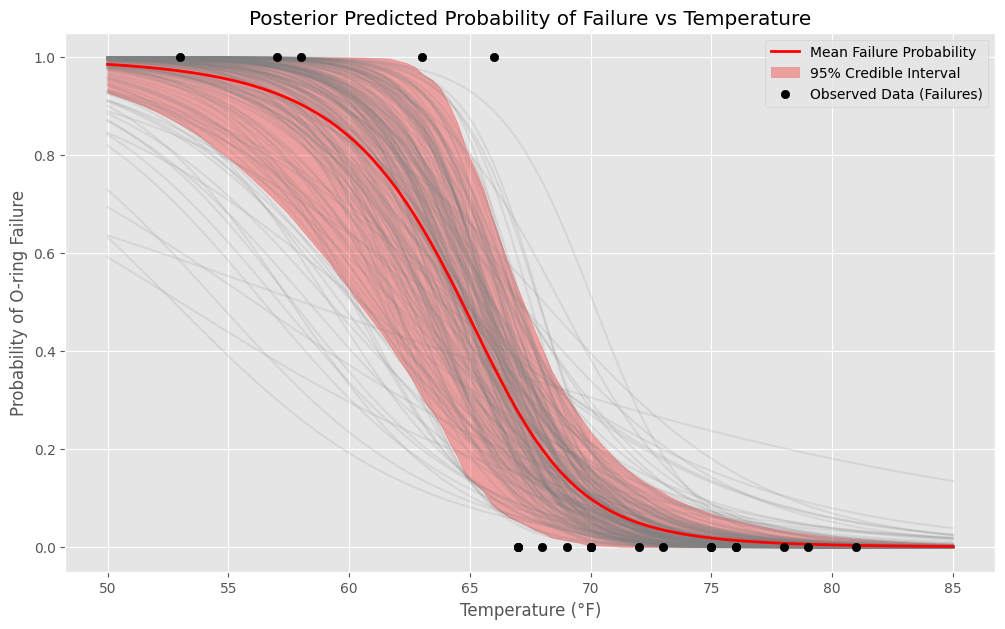

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept   -2.259  0.800  -3.849   -0.876      0.009    0.007    7488.0   
temp_effect -3.192  1.121  -5.273   -1.207      0.013    0.009    7703.0   

             ess_tail  r_hat  
intercept      8131.0    1.0  
temp_effect    9195.0    1.0  


In [ ]:

# -------------------------------
# Data: Challenger O-ring Failures
# -------------------------------
# Temperature (°F) and failure indicator (1 = failure, 0 = no failure)
temperature = np.array([66, 70, 69, 68, 67, 72, 73, 70, 57, 63,
                        70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58])
failures = np.array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])
N = len(temperature)

# Normalize temperature to aid sampling
temp_mean = np.mean(temperature)
temp_std = np.std(temperature)
temperature_norm = (temperature - temp_mean) / temp_std

# -------------------------------
# Build the Bayesian Logistic Regression Model
# -------------------------------
with pm.Model() as challenger_model:
    # Priors on intercept and slope for the logistic regression
    beta_0 = pm.Normal("intercept", mu=0, sigma=2)
    beta_1 = pm.Normal("temp_effect", mu=0, sigma=2)

    # Logistic regression: logit probability as a linear function of normalized temperature
    logit_p = beta_0 + beta_1 * temperature_norm
    p = pm.math.sigmoid(logit_p)

    # Likelihood: Bernoulli outcome for O-ring failure (0 or 1)
    observed_failures = pm.Bernoulli("failures", p=p, observed=failures)

    # Sample from the posterior using GPU-enabled NumPyro sampler.
    # We set return_inferencedata=True (default) so that trace is an InferenceData object.
    trace = pm.sample(4000, tune=2000, return_inferencedata=True)

# -------------------------------
# Posterior Predictive Plotting
# -------------------------------
# Create a temperature grid (in °F) for predictions
temp_grid = np.linspace(50, 85, 100)
# Normalize the grid using the same parameters as before
temp_grid_norm = (temp_grid - temp_mean) / temp_std

# Extract posterior samples from the InferenceData object
# Using .posterior and converting to numpy arrays:
intercept_samples = trace.posterior["intercept"].values  # shape: (chain, draw)
temp_effect_samples = trace.posterior["temp_effect"].values  # shape: (chain, draw)

# Combine chains and draws into a single dimension for each parameter:
intercept_samples = intercept_samples.reshape(-1)
temp_effect_samples = temp_effect_samples.reshape(-1)

# For each posterior sample, compute the predicted probability on the temp_grid
# We'll use the sigmoid function: 1 / (1 + exp(- (beta_0 + beta_1 * temp)))
posterior_p = 1 / (1 + np.exp(-(intercept_samples[:, None] + temp_effect_samples[:, None] * temp_grid_norm)))

# -------------------------------
# Plotting the results
# -------------------------------
plt.figure(figsize=(12, 7))

# Plot a subset (e.g., 200) of individual logistic curves to show variability
num_curves = 200
indices = np.random.choice(posterior_p.shape[0], size=num_curves, replace=False)
for idx in indices:
    plt.plot(temp_grid, posterior_p[idx, :], color="gray", alpha=0.15)

# Plot the mean predicted failure probability curve
mean_p = posterior_p.mean(axis=0)
plt.plot(temp_grid, mean_p, label="Mean Failure Probability", color="red", linewidth=2)

# Calculate the 95% HDI (credible interval) for each temperature on the grid using ArviZ
hdi = az.hdi(posterior_p, hdi_prob=0.95)
plt.fill_between(temp_grid, hdi[:, 0], hdi[:, 1], color="red", alpha=0.3, label="95% Credible Interval")

# Plot the original observed data points (temperature vs. failure outcome)
plt.scatter(temperature, failures, color="black", zorder=5, label="Observed Data (Failures)")

# Plot settings
plt.xlabel("Temperature (°F)")
plt.ylabel("Probability of O-ring Failure")
plt.title("Posterior Predicted Probability of Failure vs Temperature")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Summary of the Posterior
# -------------------------------
print(az.summary(trace, var_names=["intercept", "temp_effect"]))
